< cv2.BFMatcher 000002AFD4542F90>
26


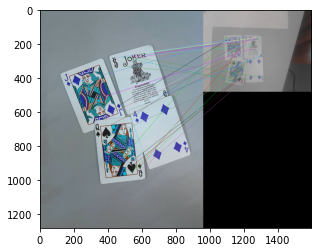

<Figure size 1080x1080 with 0 Axes>

< cv2.BFMatcher 000002AFD421A0B0>
16


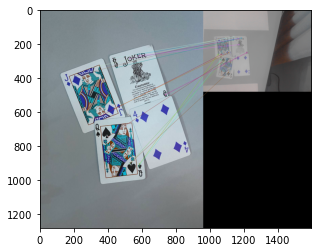

<Figure size 1080x1080 with 0 Axes>

< cv2.BFMatcher 000002AFD32F7650>
27


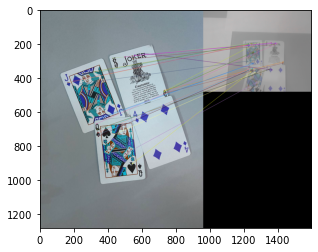

<Figure size 1080x1080 with 0 Axes>

< cv2.BFMatcher 000002AFC2A39E50>
23


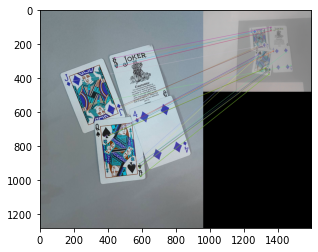

<Figure size 1080x1080 with 0 Axes>

< cv2.BFMatcher 000002AFD3333930>
30


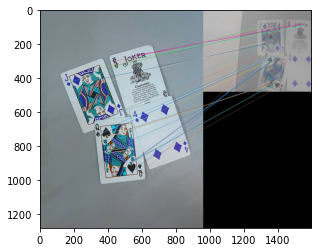

<Figure size 1080x1080 with 0 Axes>

< cv2.BFMatcher 000002AFD421A1D0>
18


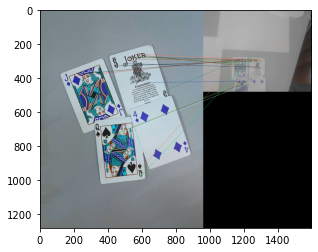

<Figure size 1080x1080 with 0 Axes>

< cv2.BFMatcher 000002AFBAFC9C50>
19


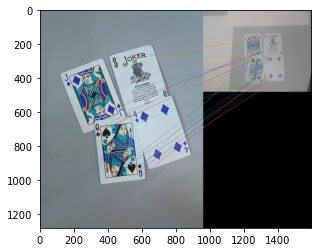

<Figure size 1080x1080 with 0 Axes>

< cv2.BFMatcher 000002AFD4542F90>
33


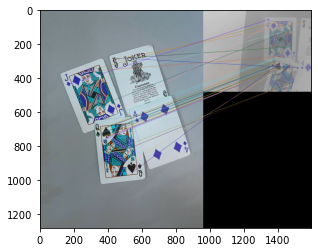

<Figure size 1080x1080 with 0 Axes>

< cv2.BFMatcher 000002AFC296C890>
21


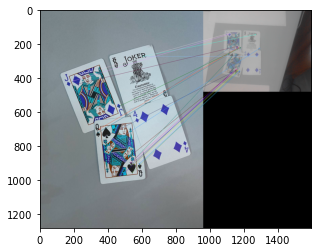

<Figure size 1080x1080 with 0 Axes>

In [7]:
import numpy as np
import cv2
import sys
from matplotlib import pyplot as plt

vid = cv2.VideoCapture(0)
img = cv2.imread('cards1.jpg')
myVid = cv2.VideoCapture('video.MOV')

success, imgVideo = myVid.read()
h,w,c = img.shape
imgVideo = cv2.resize(imgVideo,(w,h))

orb = cv2.ORB_create(nfeatures = 1000)
keypoint1, descriptor1 = orb.detectAndCompute(img, None)

while True:
    success,imgWebCam = vid.read()
#     ret, frame = vid.read()
#     writer.write(frame)
    ###
#     imgWebCam = cv2.resize(imgVideo,(w,h))
    keypoint2, descriptor2 = orb.detectAndCompute(imgWebCam, None)
    # imgWebCam = cv2.drawKeypoints(imgWebCam, keypoint2, None)
    
    
    bf = cv2.BFMatcher()
    print(bf)
    matches = bf.knnMatch(descriptor1, descriptor2, k = 2)
    good = []
    for m,n in matches:
        if m.distance < 0.75 * n.distance:
            good.append(m)
    print(len(good))
    imgFeatures = cv2.drawMatches(img, keypoint1, imgWebCam, keypoint2, good, None, flags = 2 )
    
    plt.imshow(imgFeatures)
    plt.figure(figsize=(15,15))
    plt.show()
        
    cv2.imshow('Features', imgFeatures)
#     cv2.imshow('ImgTarget', img)
#     cv2.imshow('WebCam', imgWebCam)
#     cv2.imshow('Video', imgVideo)
    if cv2.waitKey(0) & 0xFF == ord('q'):
            break
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

cv2.imshow('ImgTarget', img)
cv2.imshow('webCamVideo', imgVideo)
cv2.waitKey(0)
cv2.destroyAllWindows()

< cv2.BFMatcher 000002AFBD995AB0>
15
[[ 2.37707538e-01  7.91982472e-03  3.09048578e+02]
 [-3.57561723e-02  2.26267387e-01  1.00584747e+02]
 [ 4.25480083e-07 -5.80269607e-05  1.00000000e+00]]


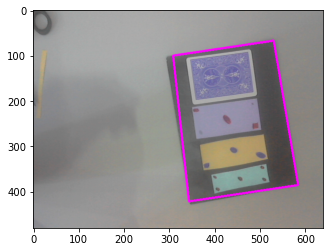

<Figure size 1080x1080 with 0 Axes>

< cv2.BFMatcher 000002AFBF5C9330>
10


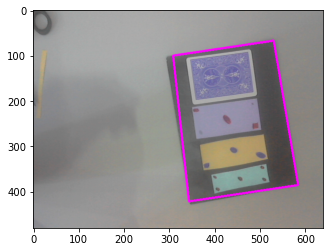

<Figure size 1080x1080 with 0 Axes>

< cv2.BFMatcher 000002AFBD9F1850>
8


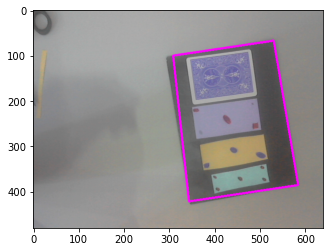

<Figure size 1080x1080 with 0 Axes>

In [24]:
import numpy as np
import cv2
import sys
from matplotlib import pyplot as plt

vid = cv2.VideoCapture(0)
img = cv2.imread('12.1 picture.jpg')
myVid = cv2.VideoCapture('video.MOV')

success, imgVideo = myVid.read()
h,w,c = img.shape
imgVideo = cv2.resize(imgVideo,(w,h))

orb = cv2.ORB_create(nfeatures = 1000)
keypoint1, descriptor1 = orb.detectAndCompute(img, None)

while True:
    success,imgWebCam = vid.read()
#     ret, frame = vid.read()
#     writer.write(frame)
    ###
#     imgWebCam = cv2.resize(imgVideo,(w,h))
    keypoint2, descriptor2 = orb.detectAndCompute(imgWebCam, None)
    # imgWebCam = cv2.drawKeypoints(imgWebCam, keypoint2, None)
    
    
    bf = cv2.BFMatcher()
    print(bf)
    matches = bf.knnMatch(descriptor1, descriptor2, k = 2)
    good = []
    for m,n in matches:
        if m.distance < 0.75 * n.distance:
            good.append(m)
    print(len(good))
    imgFeatures = cv2.drawMatches(img, keypoint1, imgWebCam, keypoint2, good, None, flags = 2 )
    
    if len(good) > 10:
        srcPts = np.float32([keypoint1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
        dstPts = np.float32([keypoint2[m.trainIdx].pt for m in good]).reshape(-1,1,2)
        
        matrix, mask = cv2.findHomography(srcPts, dstPts, cv2.RANSAC, 5)
        print(matrix)
        
        pts = np.float32([[0,0],[0,h],[w,h],[w,0]]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts, matrix)
        img2 = cv2.polylines(imgWebCam,[np.int32(dst)], True, (255,0,255),3)
        
        imgWarp = cv2.warpPerspective(imgWebCam, matrix, (imgWebCam.shape[1], imgWebCam.shape[0]))
        
    
    plt.imshow(img2)
    plt.figure(figsize=(15,15))
    plt.show()
        
#     cv2.imshow('warp', imgWarp)
    cv2.imshow('Features', imgFeatures)
    cv2.imshow('img2', img2)
#     cv2.imshow('ImgTarget', img)
#     cv2.imshow('WebCam', imgWebCam)
#     cv2.imshow('Video', imgVideo)
    if cv2.waitKey(0) & 0xFF == ord('q'):
            break
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

cv2.imshow('ImgTarget', img)
cv2.imshow('webCamVideo', imgVideo)
cv2.waitKey(0)
cv2.destroyAllWindows()




In [2]:
import cv2
import numpy as np
 
cap = cv2.VideoCapture(0)
imgTarget = cv2.imread('12.1 picture.jpg')
myVid = cv2.VideoCapture('video.mp4')
 
detection = False
frameCounter = 0
 
success, imgVideo = myVid.read()
h,w,c = imgTarget.shape
imgVideo = cv2.resize(imgVideo,(w,h))
 
orb = cv2.ORB_create(nfeatures=1000)
kp1, des1 = orb.detectAndCompute(imgTarget,None)


# function to clip together all 6 windows
def stackImages(imgArray,scale,lables=[]):
    sizeW= imgArray[1][1].shape[1]
    sizeH = imgArray[1][1].shape[0]
    rows = len(imgArray)
    cols = len(imgArray[0])
    rowsAvailable = isinstance(imgArray[0], list)
    if rowsAvailable:
        for x in range ( 0, rows):
            for y in range(0, cols):
                imgArray[x][y] = cv2.resize(imgArray[x][y], (sizeW,sizeH), None, scale, scale)
                if len(imgArray[x][y].shape) == 2: imgArray[x][y]= cv2.cvtColor( imgArray[x][y], cv2.COLOR_GRAY2BGR)
        imageBlank = np.zeros((sizeH, sizeW, 3), np.uint8)
        hor = [imageBlank]*rows
        hor_con = [imageBlank]*rows
        for x in range(0, rows):
            hor[x] = np.hstack(imgArray[x])
            hor_con[x] = np.concatenate(imgArray[x])
        ver = np.vstack(hor)
        ver_con = np.concatenate(hor)
    else:
        for x in range(0, rows):
            imgArray[x] = cv2.resize(imgArray[x], (sizeW, sizeH), None, scale, scale)
            if len(imgArray[x].shape) == 2: imgArray[x] = cv2.cvtColor(imgArray[x], cv2.COLOR_GRAY2BGR)
        hor= np.hstack(imgArray)
        hor_con= np.concatenate(imgArray)
        ver = hor
    if len(lables) != 0:
        eachImgWidth= int(ver.shape[1] / cols)
        eachImgHeight = int(ver.shape[0] / rows)
        print(eachImgHeight)
        for d in range(0, rows):
            for c in range (0,cols):
                cv2.rectangle(ver,(c*eachImgWidth,eachImgHeight*d),(c*eachImgWidth+len(lables[d])*13+27,30+eachImgHeight*d),(255,255,255),cv2.FILLED)
                cv2.putText(ver,lables[d],(eachImgWidth*c+10,eachImgHeight*d+20),cv2.FONT_HERSHEY_COMPLEX,0.7,(255,0,255),2)
    return ver
 
while True:
 
    sucess,imgWebcam = cap.read()
    imgAug = imgWebcam.copy()
    kp2, des2 = orb.detectAndCompute(imgWebcam, None)
    # imgWebcam = cv2.drawKeypoints(imgWebcam, kp2, None)
 
    if detection == False:
        myVid.set(cv2.CAP_PROP_POS_FRAMES,0)
        frameCounter = 0
    else:
        if frameCounter == myVid.get(cv2.CAP_PROP_FRAME_COUNT):
            myVid.set(cv2.CAP_PROP_POS_FRAMES, 0)
            frameCounter = 0
        success, imgVideo = myVid.read()
        imgVideo = cv2.resize(imgVideo, (w, h))
    bf = cv2.BFMatcher()
    matches = bf.knnMatch(des1,des2,k=2)
    good =[]
    for m,n in matches:
        if m.distance < 0.75 *n.distance:             
            good.append(m)     
            print(len(good))     
            imgFeatures = cv2.drawMatches(imgTarget,kp1,imgWebcam,kp2,good,None,flags=2)     
    if len(good) > 20:
        detection = True
        srcPts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
        dstPts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)
        matrix, mask = cv2.findHomography(srcPts,dstPts,cv2.RANSAC,5)
        print(matrix)
 
        pts = np.float32([[0,0],[0,h],[w,h],[w,0]]).reshape(-1,1,2)
        dst = cv2.perspectiveTransform(pts,matrix)
        img2 = cv2.polylines(imgWebcam,[np.int32(dst)],True,(255,0,255),3)
 
        imgWarp = cv2.warpPerspective(imgVideo,matrix, (imgWebcam.shape[1],imgWebcam.shape[0]))
 
        maskNew = np.zeros((imgWebcam.shape[0],imgWebcam.shape[1]),np.uint8)
        cv2.fillPoly(maskNew,[np.int32(dst)],(255,255,255))
        maskInv = cv2.bitwise_not(maskNew)
        imgAug = cv2.bitwise_and(imgAug,imgAug,mask = maskInv)
        imgAug = cv2.bitwise_or(imgWarp,imgAug)
 

        imgStacked = stackImages(([imgFeatures,imgAug, imgWarp], [imgWebcam,imgVideo,imgTarget]),0.2)
    #
    #
    # Video demonstration of result is 
    #                                 mask Result video.mp4
    #
    cv2.imshow('imgStacked', imgStacked)
    cv2.waitKey(1)
    frameCounter +=1

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
[[ 3.42042684e-01 -2.31017445e-02  1.78343837e+02]
 [-4.77749018e-02  3.34965115e-01  3.33873336e+02]
 [-1.14979475e-04 -5.63211369e-05  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
[[ 3.85081113e-01 -3.46985628e-02  1.75014737e+02]
 [-1.65176462e-02  3.36376523e-01  3.23359422e+02]
 [-3.63899150e-05 -8.28120508e-05  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
[[ 3.90220959e-01 -3.39891663e-02  1.78777182e+02]
 [-2.21516122e-02  3.46476575e-01  3.12406083e+02]
 [-4.51531539e-05 -6.89999938e-05  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
[[ 3.84599687e-01 -3.41152216e-02  1.78281363e+02]
 [-1.81139387e-02  3.39157436e-01  3.11765615e+02]
 [-4.14619166

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
[[ 3.82487485e-01  9.02655760e-03  6.91387356e+01]
 [-3.17999556e-02  3.38713179e-01  3.00892711e+02]
 [-1.77938165e-05 -5.77338108e-05  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
[[ 3.67414630e-01 -1.71193922e-03  7.24470384e+01]
 [-4.27515640e-02  3.10925492e-01  3.09405954e+02]
 [-3.99709110e-05 -8.46504646e-05  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
[[ 3.94888114e-01  7.46237326e-03  5.67950276e+01]
 [-2.16440045e-02  3.34471745e-01  3.00105626e+02]
 [ 3.04048732e-06 -6.83354721e-05  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
[[ 3.97584175e-01  7.21865879e-03  5.64266509e+01]
 [-3.61575755e-02  3.45793211e-01  3.03588894e+02]
 [-1.24456210e-05 -5.38046287e-05  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10


6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
[[ 3.89923857e-01  3.45929640e-03  1.46564246e+02]
 [-3.11349856e-02  3.99630471e-01  2.85380145e+02]
 [-6.70681636e-05 -1.03759273e-05  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
[[ 3.80658630e-01 -1.10772007e-02  1.47570485e+02]
 [-5.23280443e-02  3.80630010e-01  2.86038568e+02]
 [-9.66617176e-05 -3.21425983e-05  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
[[ 4.08840620e-01 -1.87555041e-02  1.44841088e+02]
 [-1.92735488e-02  3.73541653e-01  2.78704439e+02]
 [-3.02462053e-05 -5.91841963e-05  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
[[ 4.00140310e-01 -2.29775947e-02  1.58660800e+02]
 [-1.54136498e-02  3.60628317e-01  2.78192072e+02]
 [-2.63898273e-05 -6.83461856e-05  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
2

30
31
32
[[ 4.68622753e-01 -4.16699339e-02  1.38901355e+02]
 [ 4.23709709e-02  3.35733381e-01  3.16425844e+02]
 [ 1.15261307e-04 -1.49202684e-04  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
[[ 3.82879889e-01 -3.61272233e-02  1.49875089e+02]
 [-2.12732920e-02  3.12765461e-01  3.23090965e+02]
 [-2.81248262e-05 -1.20136006e-04  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
[[ 3.82214995e-01 -1.57076444e-02  1.53835585e+02]
 [-4.24577858e-02  3.59281905e-01  3.10054134e+02]
 [-8.37737627e-05 -4.69815169e-05  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
[[ 4.05301489e-01 -3.49168403e-02  1.78238443e+02]
 [-1.41587527e-03  3.39658134e-01  2.95165809e+02]
 [-1.41542004e-05 -9.35773891e-05  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
[[ 4.21394227e-01 -4.26091752e-02  2

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
[[ 3.89591749e-01 -4.69808683e-02  1.85521775e+02]
 [-2.07633403e-02  3.06407585e-01  2.21506887e+02]
 [-7.10186805e-05 -1.49355407e-04  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
[[ 4.42934256e-01 -3.70941738e-02  1.66937721e+02]
 [-9.07407188e-03  3.44612795e-01  2.15833737e+02]
 [-2.13527668e-05 -1.13584753e-04  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
[[ 4.35442013e-01 -4.21694722e-02  1.74383292e+02]
 [-9.64751832e-03  3.35854860e-01  2.14242824e+02]
 [-2.22989261e-05 -1.30061212e-04  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
[[ 4.21362139e-01 -4.68798821e-02  1.94514200e+02]
 [-2.05139291e-02  3.19732244e-01  2.56477842e+02]
 [-4.47532043e-05 -1.27118090e-04  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
[[ 3.92025266e-01 -4.78611390e-02

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
[[ 3.88886365e-01 -3.58497371e-02  1.71152297e+02]
 [-2.43706757e-02  2.97476428e-01  2.59324975e+02]
 [-5.33234073e-05 -1.59940258e-04  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
[[ 3.93896745e-01 -1.54235386e-02  1.63279618e+02]
 [-4.13587969e-02  3.53458174e-01  2.55106751e+02]
 [-7.59974796e-05 -7.16636106e-05  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
[[ 3.54355777e-01  6.22415743e-03  1.65682789e+02]
 [-4.60693271e-02  3.74251143e-01  2.43832531e+02]
 [-1.38583567e-04  1.76571849e-06  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
[[ 4.22241081e-01 -1.85381700e-03  1.49714312e+02]
 [-1.12662413e-02  3.41941327e-01  2.49617063e+02]
 [-1.07637864e-05 -9.11141732e-05  1.00000000e+00]]
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
[[ 4.13943298e-01 -2.66873842e-02  1.55780473

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\core\src\matmul.dispatch.cpp:550: error: (-215:Assertion failed) scn + 1 == m.cols in function 'cv::perspectiveTransform'
